# Quest10

### mean radius, mean texture 변수를 사용해 종양을 분류하는 모델에 대한 평가와 성능 향상

1. 두 개 이상의 분류 모델의 AUC를 비교해 가장 좋은 모델 한가지를 선택 (ROC, PR 곡선 중 데이터에 더 적합한 기준 선택)

2. 선택된 모델에 대해 5 fold 교차검증을 통한 그리드 서치를 시행해 최적의 파라미터를 도출
(1번에서 선택한 모델보다 좋은 성능을 내는 파라미터 찾기)

3. 최종적으로 최적의 파라미터로 튜닝된 모델로 score를 산출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
bc = load_breast_cancer() #데이터 불러오기

In [4]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
X = bc.data[:,0:2]
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [6]:
y = bc['target']

In [7]:
bc_df = pd.DataFrame(bc.data, columns = bc.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
bc_df['target'] = bc['target']

In [9]:
bc_df = bc_df[['mean radius', 'mean texture', 'target']]
bc_df.head()

,mean radius,mean texture,target
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


In [10]:
df_data = bc_df[['mean radius', 'mean texture']]
df_target = bc_df[['target']]

### ROC, PR

#### 로지스틱

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

In [12]:
model = LogisticRegression().fit(X_train,y_train)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [14]:
print(roc_auc)

0.9409465914025186


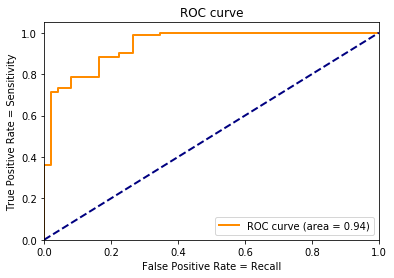

In [15]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=777)

In [44]:
model2 = DecisionTreeClassifier().fit(X_train,y_train)
y_score = model2.fit(X_train, y_train).predict_proba(X_test)
y_pred = model2.fit(X_train, y_train).predict(X_test)

In [45]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print(roc_auc)

0.8279418150238819


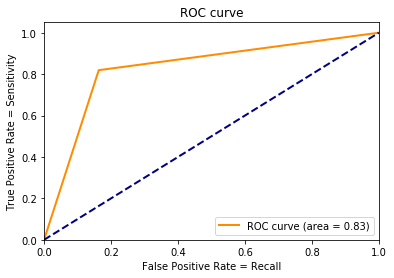

In [46]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### decision tree보다 logistic 모델이 더 좋음
### 로지스틱으로 진행

### 5fold

In [16]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in cv.split(X):
    print(X[train_index], y[test_index])

[[17.99  10.38 ]
 [19.69  21.25 ]
 [11.42  20.38 ]
 [20.29  14.34 ]
 [12.45  15.7  ]
 [18.25  19.98 ]
 [13.71  20.83 ]
 [13.    21.82 ]
 [12.46  24.04 ]
 [15.78  17.89 ]
 [15.85  23.95 ]
 [14.68  20.13 ]
 [19.81  22.15 ]
 [13.54  14.36 ]
 [13.08  15.71 ]
 [15.34  14.26 ]
 [21.16  23.04 ]
 [16.65  21.38 ]
 [17.14  16.4  ]
 [14.58  21.53 ]
 [18.61  20.25 ]
 [15.3   25.27 ]
 [17.57  15.05 ]
 [18.63  25.11 ]
 [17.02  23.98 ]
 [19.27  26.47 ]
 [16.13  17.88 ]
 [16.74  21.59 ]
 [14.25  21.72 ]
 [14.99  25.2  ]
 [13.48  20.82 ]
 [13.44  21.58 ]
 [10.95  21.35 ]
 [19.07  24.81 ]
 [13.28  20.28 ]
 [13.17  21.81 ]
 [13.17  18.66 ]
 [12.05  14.63 ]
 [13.49  22.3  ]
 [11.76  21.6  ]
 [13.64  16.34 ]
 [11.94  18.24 ]
 [18.22  18.7  ]
 [15.1   22.02 ]
 [11.52  18.75 ]
 [19.21  18.57 ]
 [14.71  21.59 ]
 [13.05  19.31 ]
 [ 8.618 11.79 ]
 [10.17  14.88 ]
 [ 8.598 20.98 ]
 [14.25  22.15 ]
 [ 9.173 13.86 ]
 [14.78  23.94 ]
 [11.31  19.04 ]
 [ 9.029 17.33 ]
 [12.78  16.49 ]
 [18.94  21.31 ]
 [17.2   24.52

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [18]:
scores = cross_val_score(LogisticRegression(), X, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores

C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.90350877, 0.90350877, 0.84210526, 0.88596491, 0.91150442])

In [19]:
display(scores.mean(), scores.var())

0.8893184288154012

0.0006270558353696

### grid

In [22]:
log_bc = LogisticRegression()

In [29]:
parameters = { 'C': [0.01, 0, 100], 'penalty': ['l1','l2'] }
grid_logistic = GridSearchCV(log_bc, param_grid = parameters, cv = 3, refit = True)

In [32]:
grid_logistic

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
grid_logistic.fit(X_train, y_train)

C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tmdgk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

ValueError: b'C <= 0'

In [33]:
print('GridSearchCV 최적 파라미터: ', grid_logistic.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_logistic.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [38]:
estimator = grid_log_bc.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'